# Enter ctrl+F9 to run the below code. Make sure to keep the dataset

# in the same folder.

# If using google colab first upload the dataset and then enter ctrl+F9

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
df=pd.read_csv('insurance (1).csv')
print(df.head())
df.shape

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


(1338, 7)

In [ ]:

print('features : ',df.columns)
print('Informations :')
print(df.info())

NameError: name 'df' is not defined

In [ ]:
df.describe()

NameError: name 'df' is not defined

# categorical variables

In [ ]:
print('sex :' , df['sex'].unique())
print('Smoker : ', df['smoker'].unique())
print('Region : ', df['region'].unique())

sex : ['female' 'male']
Smoker :  ['yes' 'no']
Region :  ['southwest' 'southeast' 'northwest' 'northeast']


# One hot encoding

In [ ]:
df1=df.copy()
df1['sex']=df1['sex'].map({'female': 1 ,'male':0})
df1['smoker']=df1['smoker'].map({'yes':1, 'no':0})
df1=pd.get_dummies(df1, columns=['region'])
print(df1.head())
df1=df1.drop(columns=['region_southwest'])
df1=df1.astype(float)
print(df1.head())


   age  sex     bmi  children  smoker      charges  region_northeast  \
0   19    1  27.900         0       1  16884.92400             False   
1   18    0  33.770         1       0   1725.55230             False   
2   28    0  33.000         3       0   4449.46200             False   
3   33    0  22.705         0       0  21984.47061             False   
4   32    0  28.880         0       0   3866.85520             False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False  
    age  sex     bmi  children  smoker      charges  region_northeast  \
0  19.0  1.0  27.900       0.0     1.0  16884.92400               0.0   
1  18.0  0.0  33.770       1.0     0.0   1725.55230               0.0   


# moving the charges in the end

In [ ]:
df1 = df1[[c for c in df1.columns if c != df1.columns[5]] + [df1.columns[5]]]
df1.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,charges,region_northeast
0,19.0,1.0,27.900,0.0,1.0,0.0,0.0,16884.92400,0.0
1,18.0,0.0,33.770,1.0,0.0,0.0,1.0,1725.55230,0.0
2,28.0,0.0,33.000,3.0,0.0,0.0,1.0,4449.46200,0.0
3,33.0,0.0,22.705,0.0,0.0,1.0,0.0,21984.47061,0.0
4,32.0,0.0,28.880,0.0,0.0,1.0,0.0,3866.85520,0.0


In [ ]:
import pandas as pd
from scipy.stats import pearsonr

independent_vars = ['age', 'bmi', 'children', 'sex', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast']
dependent_var = 'charges'

variables = []
pearson_coefficients = []
p_values = []

for col in independent_vars:
    pearson_coef, p_value = pearsonr(df1[col], df1[dependent_var])
    variables.append(col)
    pearson_coefficients.append(pearson_coef)
    p_values.append(p_value)

result_df = pd.DataFrame({
    'Variable': variables,
    'Pearson Coefficient': pearson_coefficients,
    'P-value': p_values
})

print(result_df)

           Variable  Pearson Coefficient        P-value
0               age             0.299008   4.886693e-29
1               bmi             0.198341   2.459086e-13
2          children             0.067998   1.285213e-02
3               sex            -0.057292   3.613272e-02
4            smoker             0.787251  8.271436e-283
5  region_northeast             0.006349   8.165264e-01
6  region_northwest            -0.039905   1.445970e-01
7  region_southeast             0.073982   6.782699e-03


In [ ]:
correlation_matrix = df1.corr()
print(correlation_matrix)


                       age       sex       bmi  children    smoker  \
age               1.000000  0.020856  0.109272  0.042469 -0.025019   
sex               0.020856  1.000000 -0.046371 -0.017163 -0.076185   
bmi               0.109272 -0.046371  1.000000  0.012759  0.003750   
children          0.042469 -0.017163  0.012759  1.000000  0.007673   
smoker           -0.025019 -0.076185  0.003750  0.007673  1.000000   
region_northeast  0.002475  0.002425 -0.138156 -0.022808  0.002811   
region_northwest -0.000407  0.011156 -0.135996  0.024806 -0.036945   
region_southeast -0.011642 -0.017117  0.270025 -0.023066  0.068498   
charges           0.299008 -0.057292  0.198341  0.067998  0.787251   

                  region_northeast  region_northwest  region_southeast  \
age                       0.002475         -0.000407         -0.011642   
sex                       0.002425          0.011156         -0.017117   
bmi                      -0.138156         -0.135996          0.270025   
chi

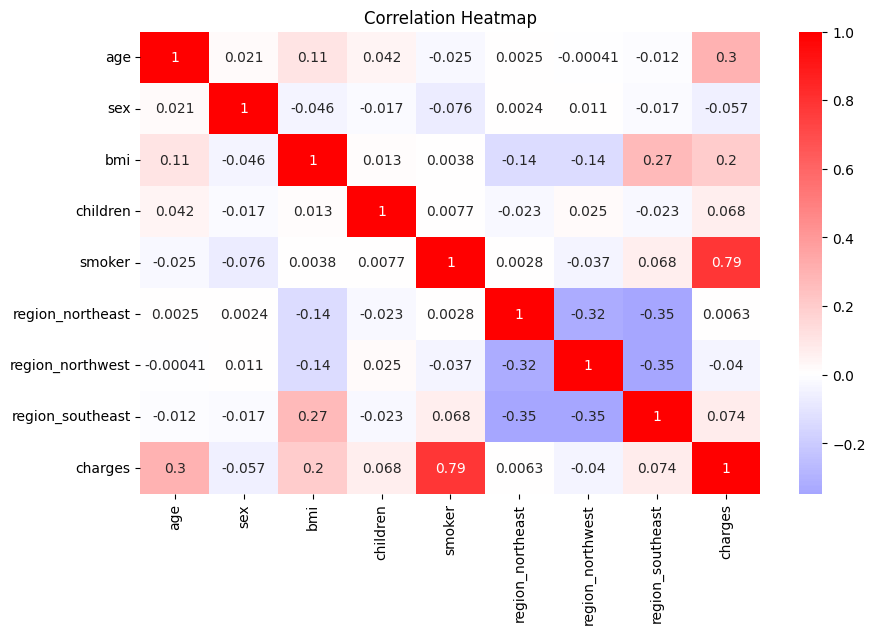

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='bwr',center=0)

plt.title('Correlation Heatmap')
plt.show()

# Most significat variables without scaling test run

╒═══════════════════════╤═════════╤═════════════╤══════════╤═══════════╕
│ Algorithm             │     MAE │         MSE │       R² │   MPE (%) │
╞═══════════════════════╪═════════╪═════════════╪══════════╪═══════════╡
│ Linear Regression     │ 4260.56 │ 3.45128e+07 │ 0.777693 │   49.5705 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ Polynomial Regression │ 2841.2  │ 2.15528e+07 │ 0.861172 │   36.0797 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ Ridge Regression      │ 4271.8  │ 3.45483e+07 │ 0.777465 │   49.7943 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ Lasso Regression      │ 4261.02 │ 3.45143e+07 │ 0.777684 │   49.5792 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ Random Forest         │ 2755.45 │ 2.56832e+07 │ 0.834567 │   39.6831 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ Decision Tree         │ 3144.32 │ 4.02181e+07 │ 0

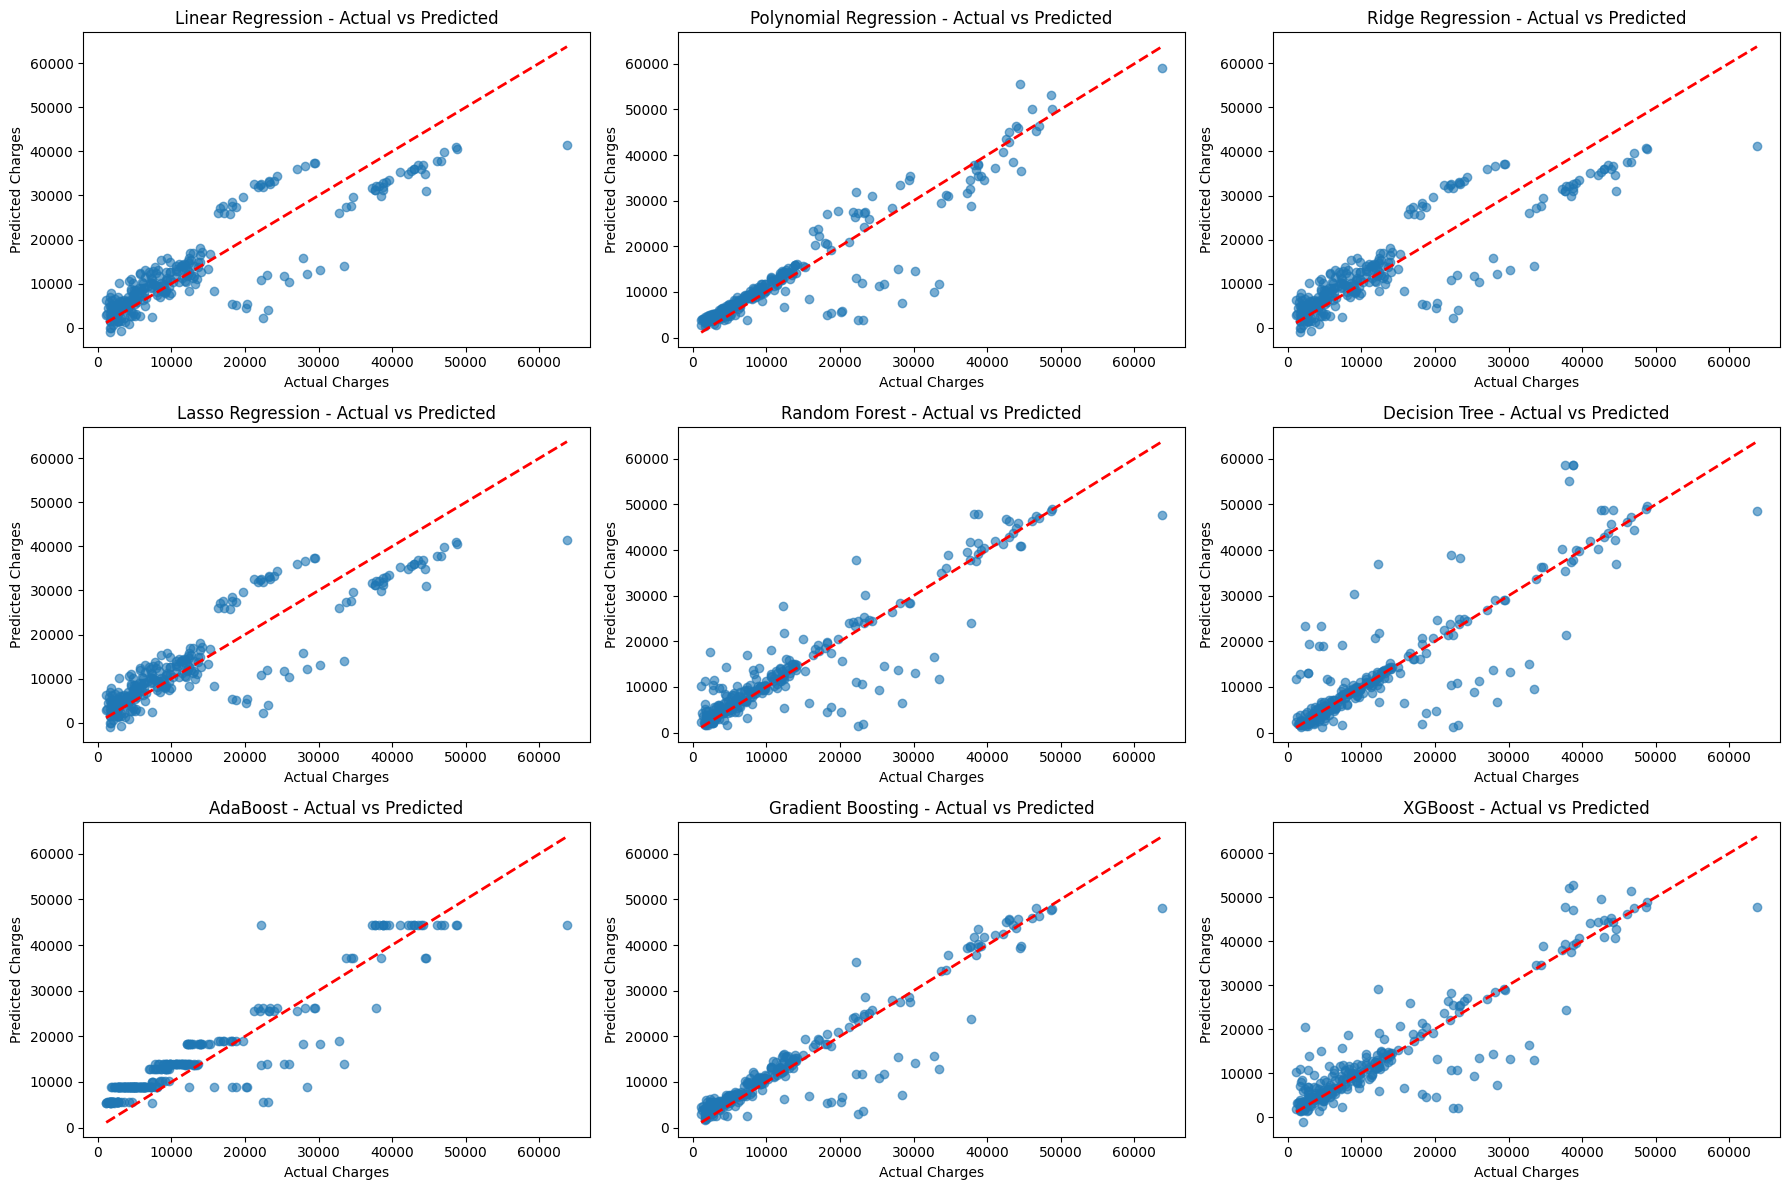

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Independent and dependent variables
independent_vars = ['age', 'bmi', 'smoker']
dependent_var = 'charges'

# Splitting the dataset
X = df1[independent_vars]
y = df1[dependent_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define algorithms
algos = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression': Pipeline([
        ('poly_features', PolynomialFeatures(degree=2)),
        ('linear_regression', LinearRegression())
    ]),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

# To store results
results = {}

# Train and evaluate each algorithm
for name, model in algos.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    percentage_errors = np.abs((y_test - y_pred) / y_test) * 100
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R²": r2_score(y_test, y_pred),
        "MPE": np.mean(percentage_errors),
        "Predictions": y_pred,
        "Percentage Errors": percentage_errors
    }

# Prepare the data for the table
metrics_table = {
    "Algorithm": [],
    "MAE": [],
    "MSE": [],
    "R²": [],
    "MPE (%)": []
}

for name, metrics in results.items():
    metrics_table["Algorithm"].append(name)
    metrics_table["MAE"].append(metrics['MAE'])
    metrics_table["MSE"].append(metrics['MSE'])
    metrics_table["R²"].append(metrics['R²'])
    metrics_table["MPE (%)"].append(metrics['MPE'])

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_table)

# Pretty-print the table
from tabulate import tabulate
print(tabulate(metrics_df, headers='keys', tablefmt='fancy_grid', showindex=False))


# Plot actual vs predicted charges
plt.figure(figsize=(18, 12))
for i, (name, metrics) in enumerate(results.items(), 1):
    plt.subplot(3, 3, i)
    plt.scatter(y_test, metrics["Predictions"], alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f"{name} - Actual vs Predicted")
    plt.xlabel("Actual Charges")
    plt.ylabel("Predicted Charges")

plt.tight_layout()
plt.show()


# Most significat variables with standard scaling test run

╒═══════════════════════╤═════════╤═════════════╤══════════╤═══════════╕
│ Algorithm             │     MAE │         MSE │       R² │   MPE (%) │
╞═══════════════════════╪═════════╪═════════════╪══════════╪═══════════╡
│ Linear Regression     │ 4181.19 │ 3.35969e+07 │ 0.783593 │   46.8883 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ Polynomial Regression │ 2743.4  │ 2.07246e+07 │ 0.866507 │   30.5028 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ Ridge Regression      │ 4182.74 │ 3.36046e+07 │ 0.783543 │   46.9274 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ Lasso Regression      │ 4181.2  │ 3.35993e+07 │ 0.783578 │   46.8919 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ Random Forest         │ 2524.87 │ 2.13099e+07 │ 0.862737 │   30.6006 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ Decision Tree         │ 2987.68 │ 3.99351e+07 │ 0

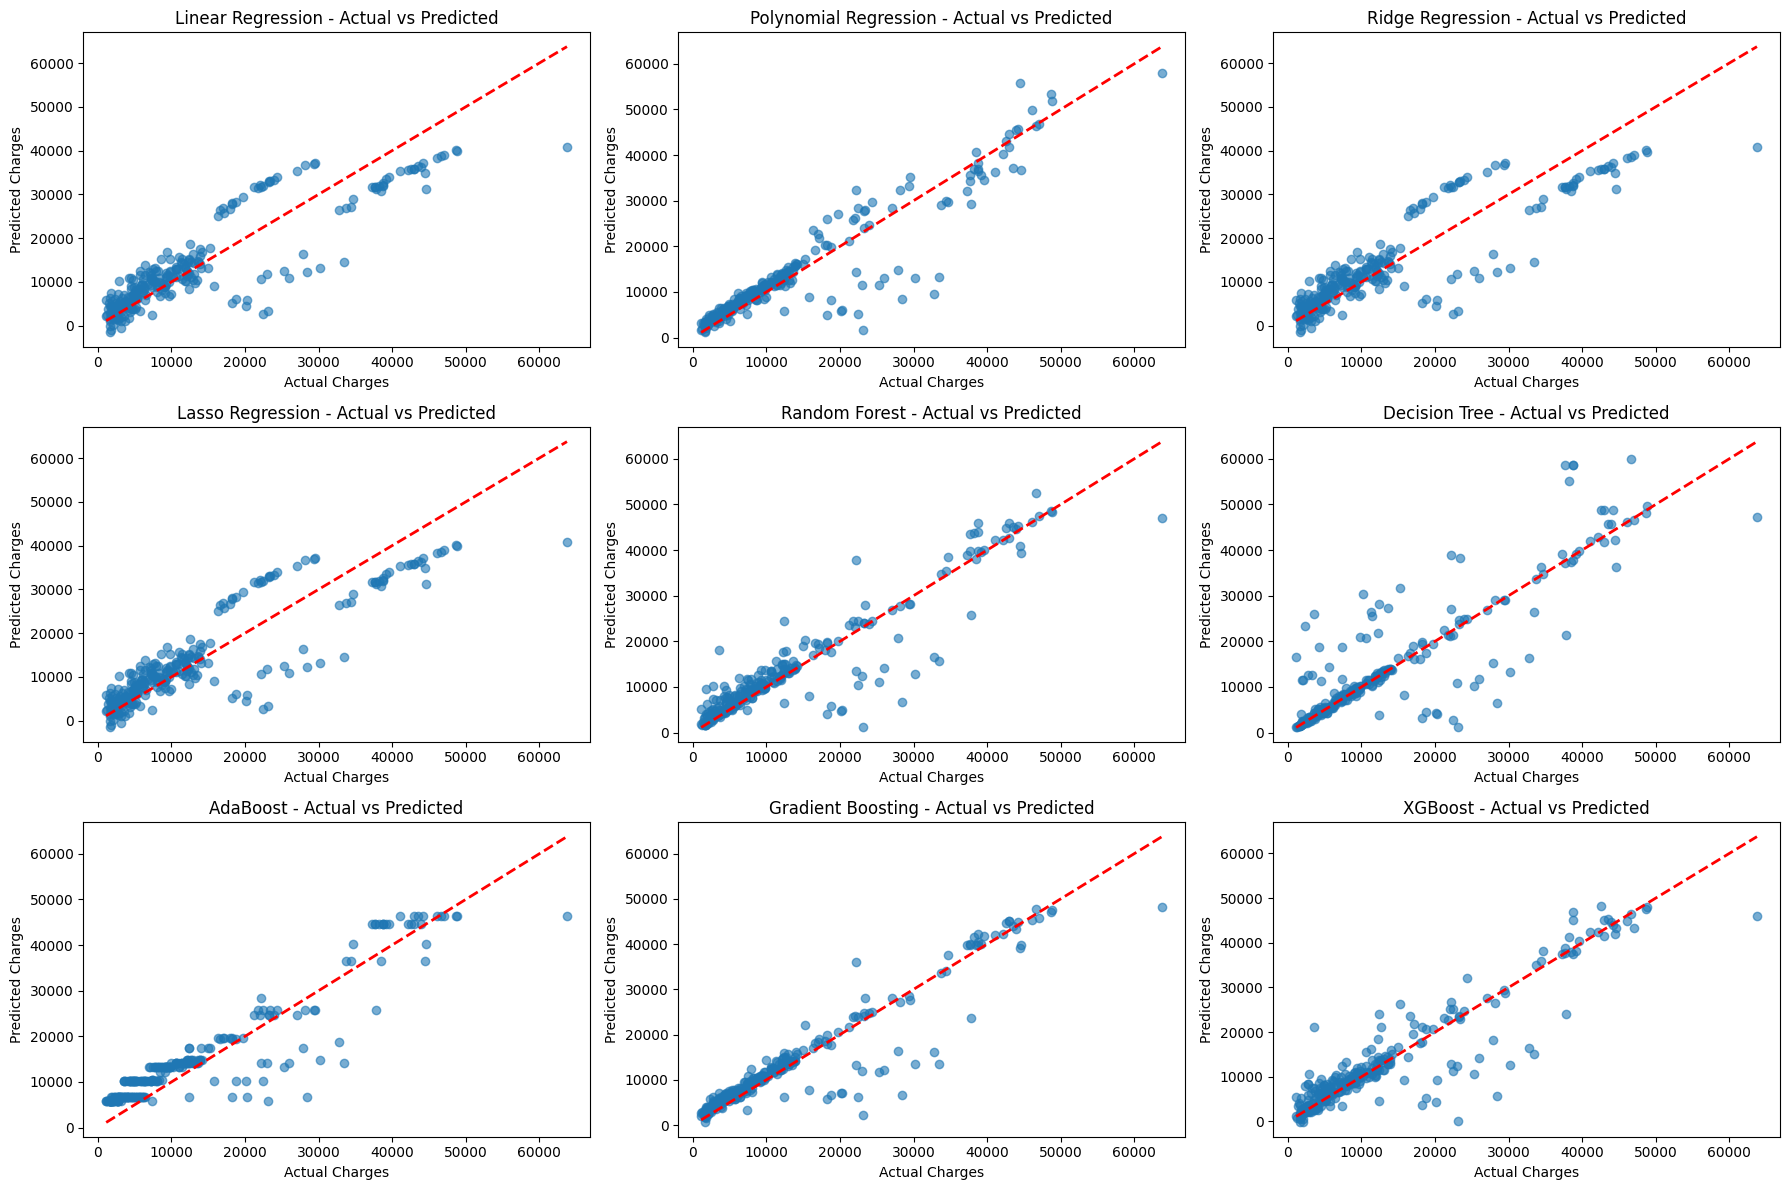

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Independent and dependent variables
independent_vars = ['age', 'bmi', 'children', 'sex', 'smoker',
                    'region_northeast', 'region_northwest', 'region_southeast']
dependent_var = 'charges'

# Splitting the dataset
X = df1[independent_vars]
y = df1[dependent_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data for neural networks
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define algorithms
algos = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression': Pipeline([
        ('poly_features', PolynomialFeatures(degree=2)),
        ('linear_regression', LinearRegression())
    ]),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

# To store results
results = {}

# Train and evaluate each algorithm
for name, model in algos.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    percentage_errors = np.abs((y_test - y_pred) / y_test) * 100
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R²": r2_score(y_test, y_pred),
        "MPE": np.mean(percentage_errors),
        "Predictions": y_pred,
        "Percentage Errors": percentage_errors
    }

# Prepare the data for the table
metrics_table = {
    "Algorithm": [],
    "MAE": [],
    "MSE": [],
    "R²": [],
    "MPE (%)": []
}

for name, metrics in results.items():
    metrics_table["Algorithm"].append(name)
    metrics_table["MAE"].append(metrics['MAE'])
    metrics_table["MSE"].append(metrics['MSE'])
    metrics_table["R²"].append(metrics['R²'])
    metrics_table["MPE (%)"].append(metrics['MPE'])

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_table)

# Pretty-print the table
from tabulate import tabulate
print(tabulate(metrics_df, headers='keys', tablefmt='fancy_grid', showindex=False))

# Plot actual vs predicted charges
plt.figure(figsize=(18, 12))
for i, (name, metrics) in enumerate(results.items(), 1):
    plt.subplot(3, 3, i)
    plt.scatter(y_test, metrics["Predictions"], alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f"{name} - Actual vs Predicted")
    plt.xlabel("Actual Charges")
    plt.ylabel("Predicted Charges")

plt.tight_layout()
plt.show()


# All variables without scaling test run

╒═══════════════════════╤═════════╤═════════════╤══════════╤═══════════╕
│ Algorithm             │     MAE │         MSE │       R² │   MPE (%) │
╞═══════════════════════╪═════════╪═════════════╪══════════╪═══════════╡
│ Linear Regression     │ 4181.19 │ 3.35969e+07 │ 0.783593 │   46.8883 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ Polynomial Regression │ 2729.18 │ 2.08862e+07 │ 0.865466 │   30.1066 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ Ridge Regression      │ 4193.32 │ 3.36432e+07 │ 0.783295 │   47.1314 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ Lasso Regression      │ 4181.74 │ 3.36013e+07 │ 0.783565 │   46.9032 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ Random Forest         │ 2569.74 │ 2.20218e+07 │ 0.858151 │   31.1329 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ Decision Tree         │ 3146    │ 4.64557e+07 │ 0

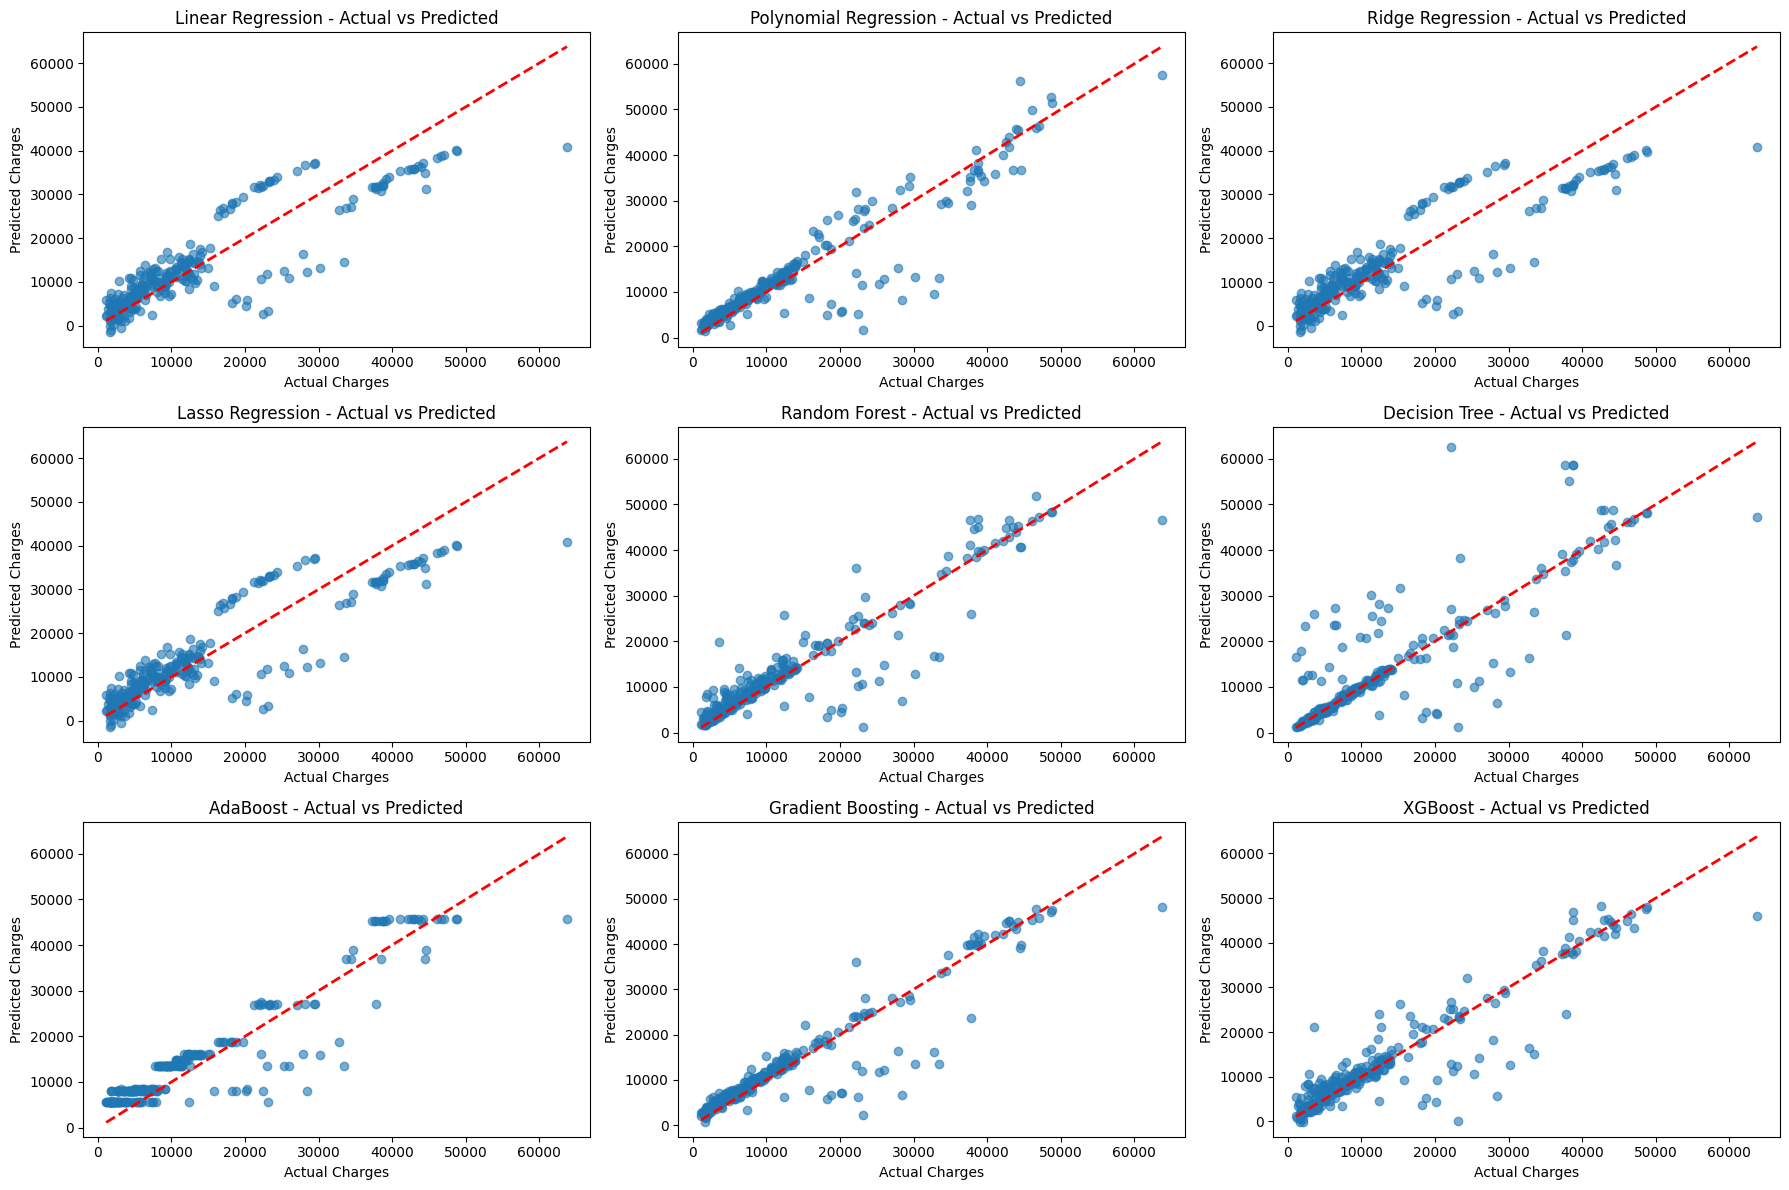

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Independent and dependent variables
independent_vars = ['age', 'bmi', 'children', 'sex', 'smoker',
                    'region_northeast', 'region_northwest', 'region_southeast']
dependent_var = 'charges'

# Splitting the dataset
X = df1[independent_vars]
y = df1[dependent_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define algorithms
algos = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression': Pipeline([
        ('poly_features', PolynomialFeatures(degree=2)),
        ('linear_regression', LinearRegression())
    ]),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

# To store results
results = {}

# Train and evaluate each algorithm
for name, model in algos.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    percentage_errors = np.abs((y_test - y_pred) / y_test) * 100
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R²": r2_score(y_test, y_pred),
        "MPE": np.mean(percentage_errors),
        "Predictions": y_pred,
        "Percentage Errors": percentage_errors
    }

# Prepare the data for the table
metrics_table = {
    "Algorithm": [],
    "MAE": [],
    "MSE": [],
    "R²": [],
    "MPE (%)": []
}

for name, metrics in results.items():
    metrics_table["Algorithm"].append(name)
    metrics_table["MAE"].append(metrics['MAE'])
    metrics_table["MSE"].append(metrics['MSE'])
    metrics_table["R²"].append(metrics['R²'])
    metrics_table["MPE (%)"].append(metrics['MPE'])

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_table)

# Pretty-print the table
from tabulate import tabulate
print(tabulate(metrics_df, headers='keys', tablefmt='fancy_grid', showindex=False))

# Plot actual vs predicted charges
plt.figure(figsize=(18, 12))
for i, (name, metrics) in enumerate(results.items(), 1):
    plt.subplot(3, 3, i)
    plt.scatter(y_test, metrics["Predictions"], alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f"{name} - Actual vs Predicted")
    plt.xlabel("Actual Charges")
    plt.ylabel("Predicted Charges")

plt.tight_layout()
plt.show()


# All variables with standard scaling test run

╒═══════════════════════╤═════════╤═════════════╤══════════╤═══════════╕
│ Algorithm             │     MAE │         MSE │       R² │   MPE (%) │
╞═══════════════════════╪═════════╪═════════════╪══════════╪═══════════╡
│ Linear Regression     │ 4181.19 │ 3.35969e+07 │ 0.783593 │   46.8883 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ Polynomial Regression │ 2743.4  │ 2.07246e+07 │ 0.866507 │   30.5028 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ Ridge Regression      │ 4182.74 │ 3.36046e+07 │ 0.783543 │   46.9274 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ Lasso Regression      │ 4181.2  │ 3.35993e+07 │ 0.783578 │   46.8919 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ Random Forest         │ 2493.08 │ 2.15049e+07 │ 0.861481 │   29.0193 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ Decision Tree         │ 3055.37 │ 4.19117e+07 │ 0

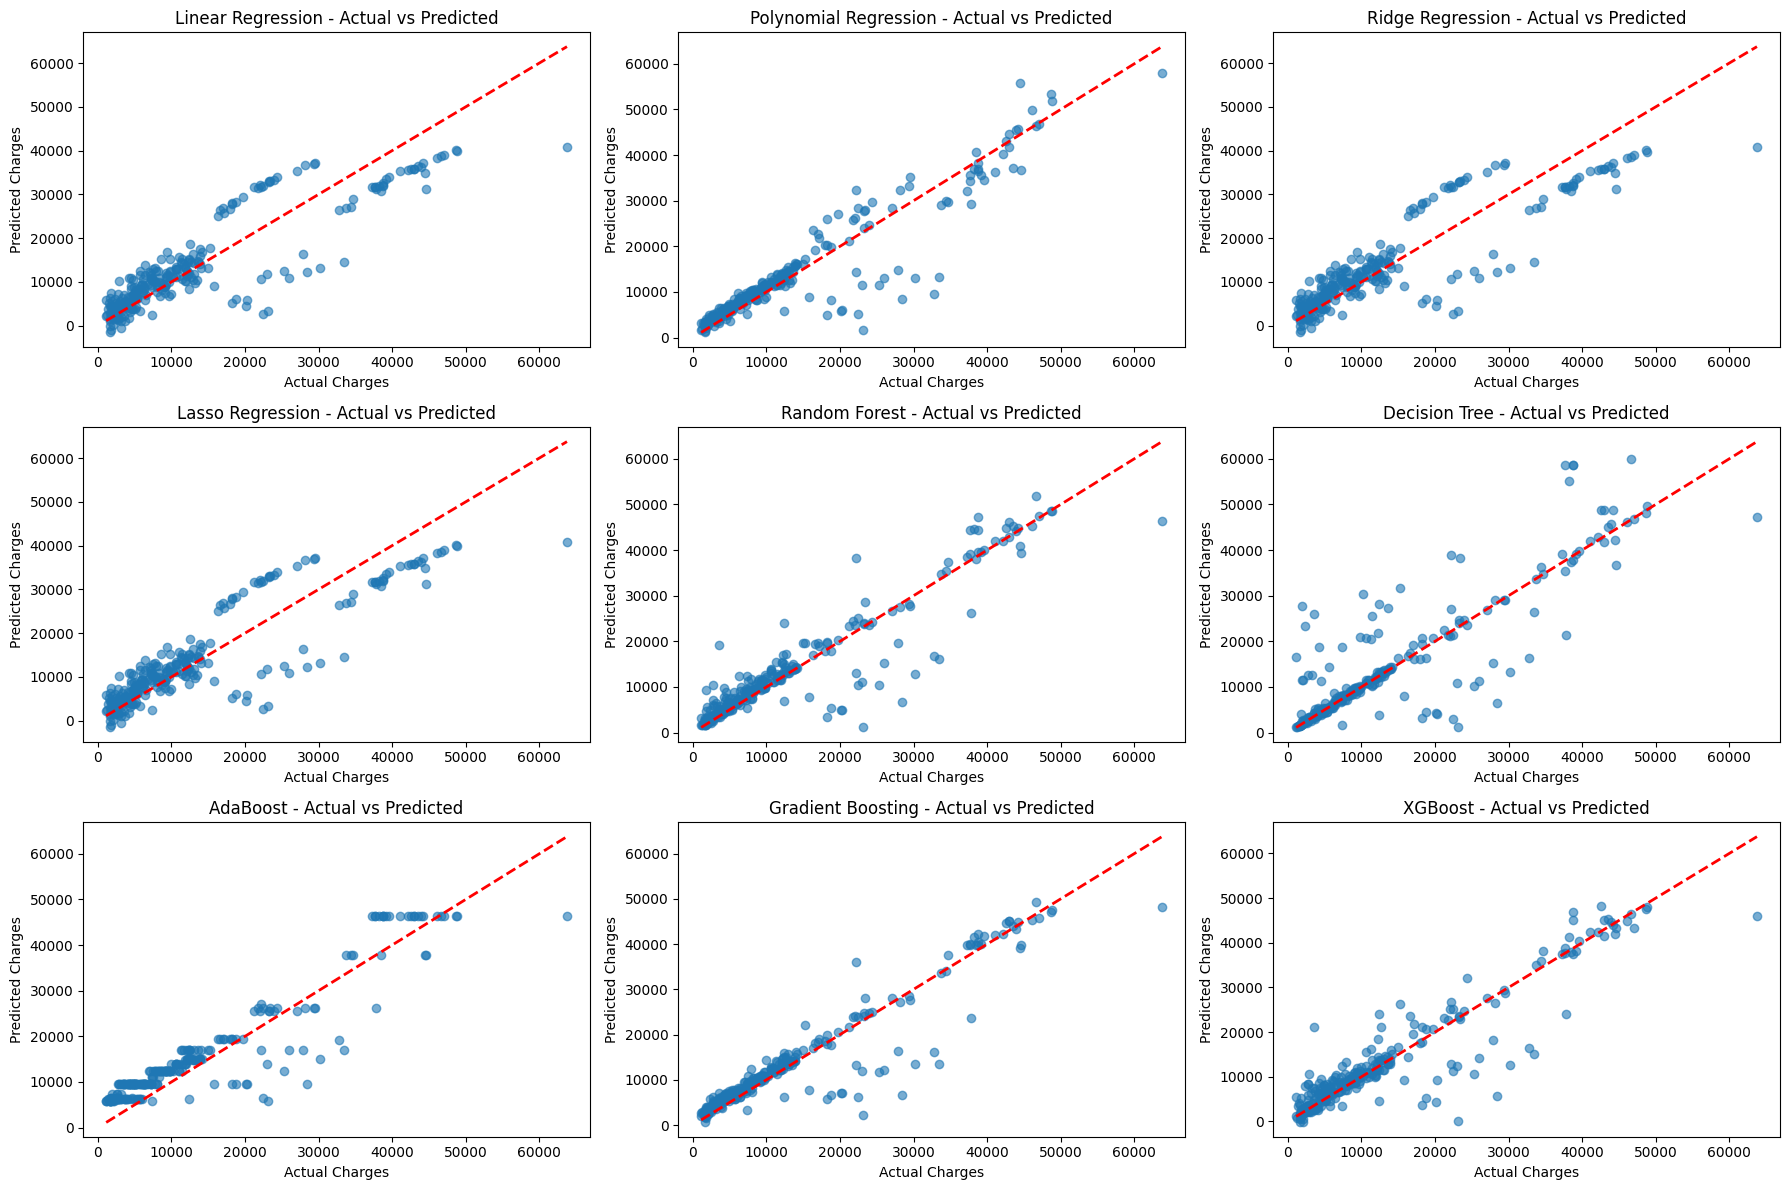

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Independent and dependent variables
independent_vars = ['age', 'bmi', 'children', 'sex', 'smoker',
                    'region_northeast', 'region_northwest', 'region_southeast']
dependent_var = 'charges'

# Splitting the dataset
X = df1[independent_vars]
y = df1[dependent_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data for neural networks
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define algorithms
algos = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression': Pipeline([
        ('poly_features', PolynomialFeatures(degree=2)),
        ('linear_regression', LinearRegression())
    ]),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

# To store results
results = {}

# Train and evaluate each algorithm
for name, model in algos.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    percentage_errors = np.abs((y_test - y_pred) / y_test) * 100
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R²": r2_score(y_test, y_pred),
        "MPE": np.mean(percentage_errors),
        "Predictions": y_pred,
        "Percentage Errors": percentage_errors
    }

# Prepare the data for the table
metrics_table = {
    "Algorithm": [],
    "MAE": [],
    "MSE": [],
    "R²": [],
    "MPE (%)": []
}

for name, metrics in results.items():
    metrics_table["Algorithm"].append(name)
    metrics_table["MAE"].append(metrics['MAE'])
    metrics_table["MSE"].append(metrics['MSE'])
    metrics_table["R²"].append(metrics['R²'])
    metrics_table["MPE (%)"].append(metrics['MPE'])

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_table)

# Pretty-print the table
from tabulate import tabulate
print(tabulate(metrics_df, headers='keys', tablefmt='fancy_grid', showindex=False))

# Plot actual vs predicted charges
plt.figure(figsize=(18, 12))
for i, (name, metrics) in enumerate(results.items(), 1):
    plt.subplot(3, 3, i)
    plt.scatter(y_test, metrics["Predictions"], alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f"{name} - Actual vs Predicted")
    plt.xlabel("Actual Charges")
    plt.ylabel("Predicted Charges")

plt.tight_layout()
plt.show()


# Most significant variables without scaling

╒═══════════════════════╤═════════╤═════════════╤══════════╤═══════════╕
│ Algorithm             │     MAE │         MSE │       R² │   MPE (%) │
╞═══════════════════════╪═════════╪═════════════╪══════════╪═══════════╡
│ linear_regression     │ 4260.56 │ 3.45128e+07 │ 0.777693 │   49.5705 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ polynomial_regression │ 2873.53 │ 2.54628e+07 │ 0.835987 │   36.7437 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ ridge_regression      │ 4271.8  │ 3.45483e+07 │ 0.777465 │   49.7943 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ lasso_regression      │ 4265.12 │ 3.45279e+07 │ 0.777596 │   49.658  │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ random_forest         │ 2606.72 │ 2.08735e+07 │ 0.865548 │   36.9301 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ decision_tree         │ 2712.46 │ 2.13146e+07 │ 0

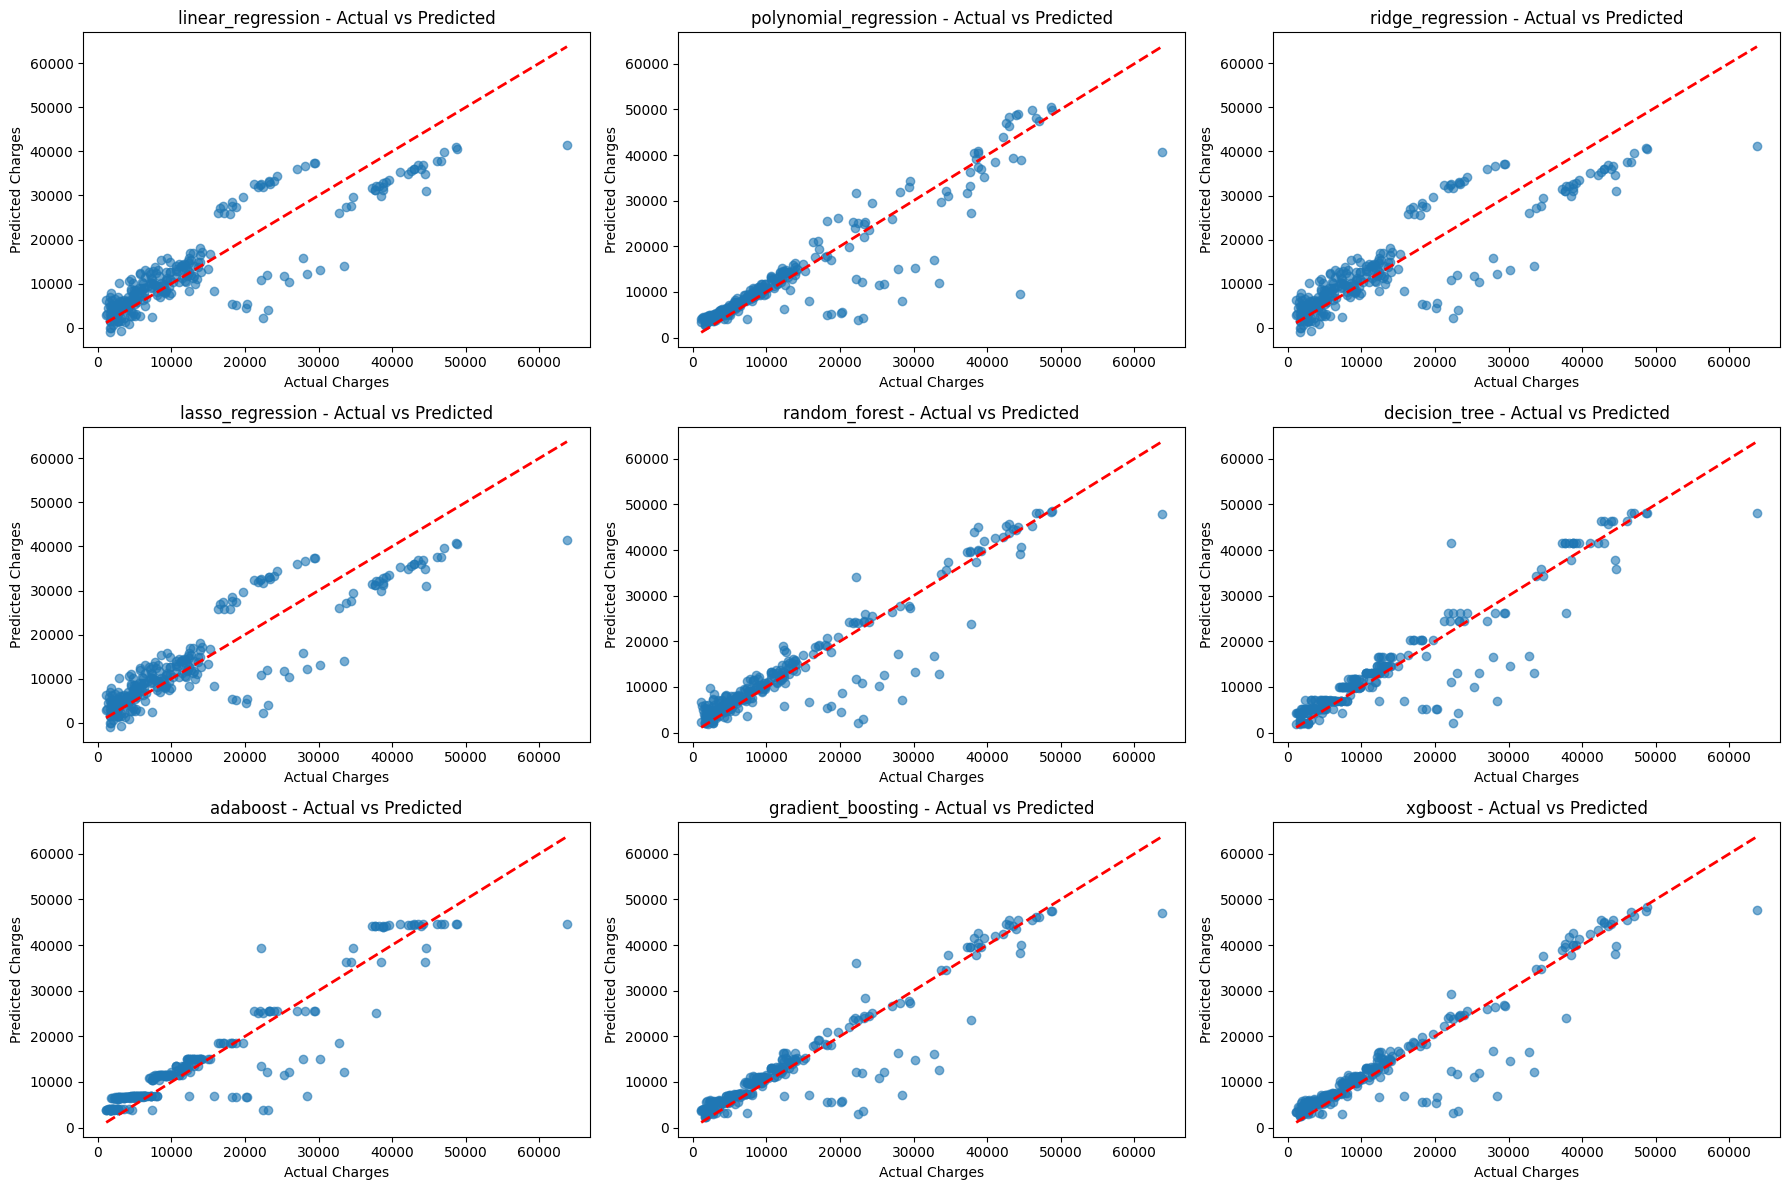

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Independent and dependent variables
independent_vars = ['age', 'bmi', 'smoker']
dependent_var = 'charges'

# Splitting the dataset
X = df1[independent_vars]
y = df1[dependent_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define algorithms and their hyperparameters
algos = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'polynomial_regression': {
        'model': Pipeline([
            ('poly_features', PolynomialFeatures()),
            ('linear_regression', LinearRegression())
        ]),
        'params': {
            'poly_features__degree': [2, 3, 4]
        }
    },
    'ridge_regression': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1, 10, 100],
            'solver': ['auto', 'svd', 'cholesky', 'saga']
        }
    },
    'lasso_regression': {
        'model': Lasso(),
        'params': {
            'alpha': [0.01, 0.1, 1, 10],
            'selection': ['random', 'cyclic']
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'adaboost': {
        'model': AdaBoostRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0]
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10]
        }
    },
    'xgboost': {
        'model': XGBRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10],
            'subsample': [0.8, 1.0]
        }
    }
}

# To store results
results = {}

# Perform grid search for each algorithm
for name, algo in algos.items():
    grid_search = GridSearchCV(algo['model'], algo['params'], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    percentage_errors = np.abs((y_test - y_pred) / y_test) * 100
    results[name] = {
        "Best Params": grid_search.best_params_,
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R²": r2_score(y_test, y_pred),
        "MPE": np.mean(percentage_errors),
        "Predictions": y_pred,
        "Percentage Errors": percentage_errors
    }

# Prepare the data for the table
metrics_table = {
    "Algorithm": [],
    "MAE": [],
    "MSE": [],
    "R²": [],
    "MPE (%)": []
}

for name, metrics in results.items():
    metrics_table["Algorithm"].append(name)
    metrics_table["MAE"].append(metrics['MAE'])
    metrics_table["MSE"].append(metrics['MSE'])
    metrics_table["R²"].append(metrics['R²'])
    metrics_table["MPE (%)"].append(metrics['MPE'])

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_table)

# Pretty-print the table
from tabulate import tabulate
print(tabulate(metrics_df, headers='keys', tablefmt='fancy_grid', showindex=False))

# Plot actual vs predicted charges
plt.figure(figsize=(18, 12))
for i, (name, metrics) in enumerate(results.items(), 1):
    plt.subplot(3, 3, i)
    plt.scatter(y_test, metrics["Predictions"], alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f"{name} - Actual vs Predicted")
    plt.xlabel("Actual Charges")
    plt.ylabel("Predicted Charges")

plt.tight_layout()
plt.show()


# Most significant variables with standard scaling

╒═══════════════════════╤═════════╤═════════════╤══════════╤═══════════╕
│ Algorithm             │     MAE │         MSE │       R² │   MPE (%) │
╞═══════════════════════╪═════════╪═════════════╪══════════╪═══════════╡
│ linear_regression     │ 4260.56 │ 3.45128e+07 │ 0.777693 │   49.5705 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ polynomial_regression │ 2844.46 │ 2.5602e+07  │ 0.83509  │   36.0596 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ ridge_regression      │ 4262.08 │ 3.45181e+07 │ 0.777659 │   49.6103 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ lasso_regression      │ 4259.87 │ 3.45172e+07 │ 0.777665 │   49.5622 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ random_forest         │ 2653.73 │ 2.11369e+07 │ 0.863852 │   38.2607 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ decision_tree         │ 2712.46 │ 2.13146e+07 │ 0

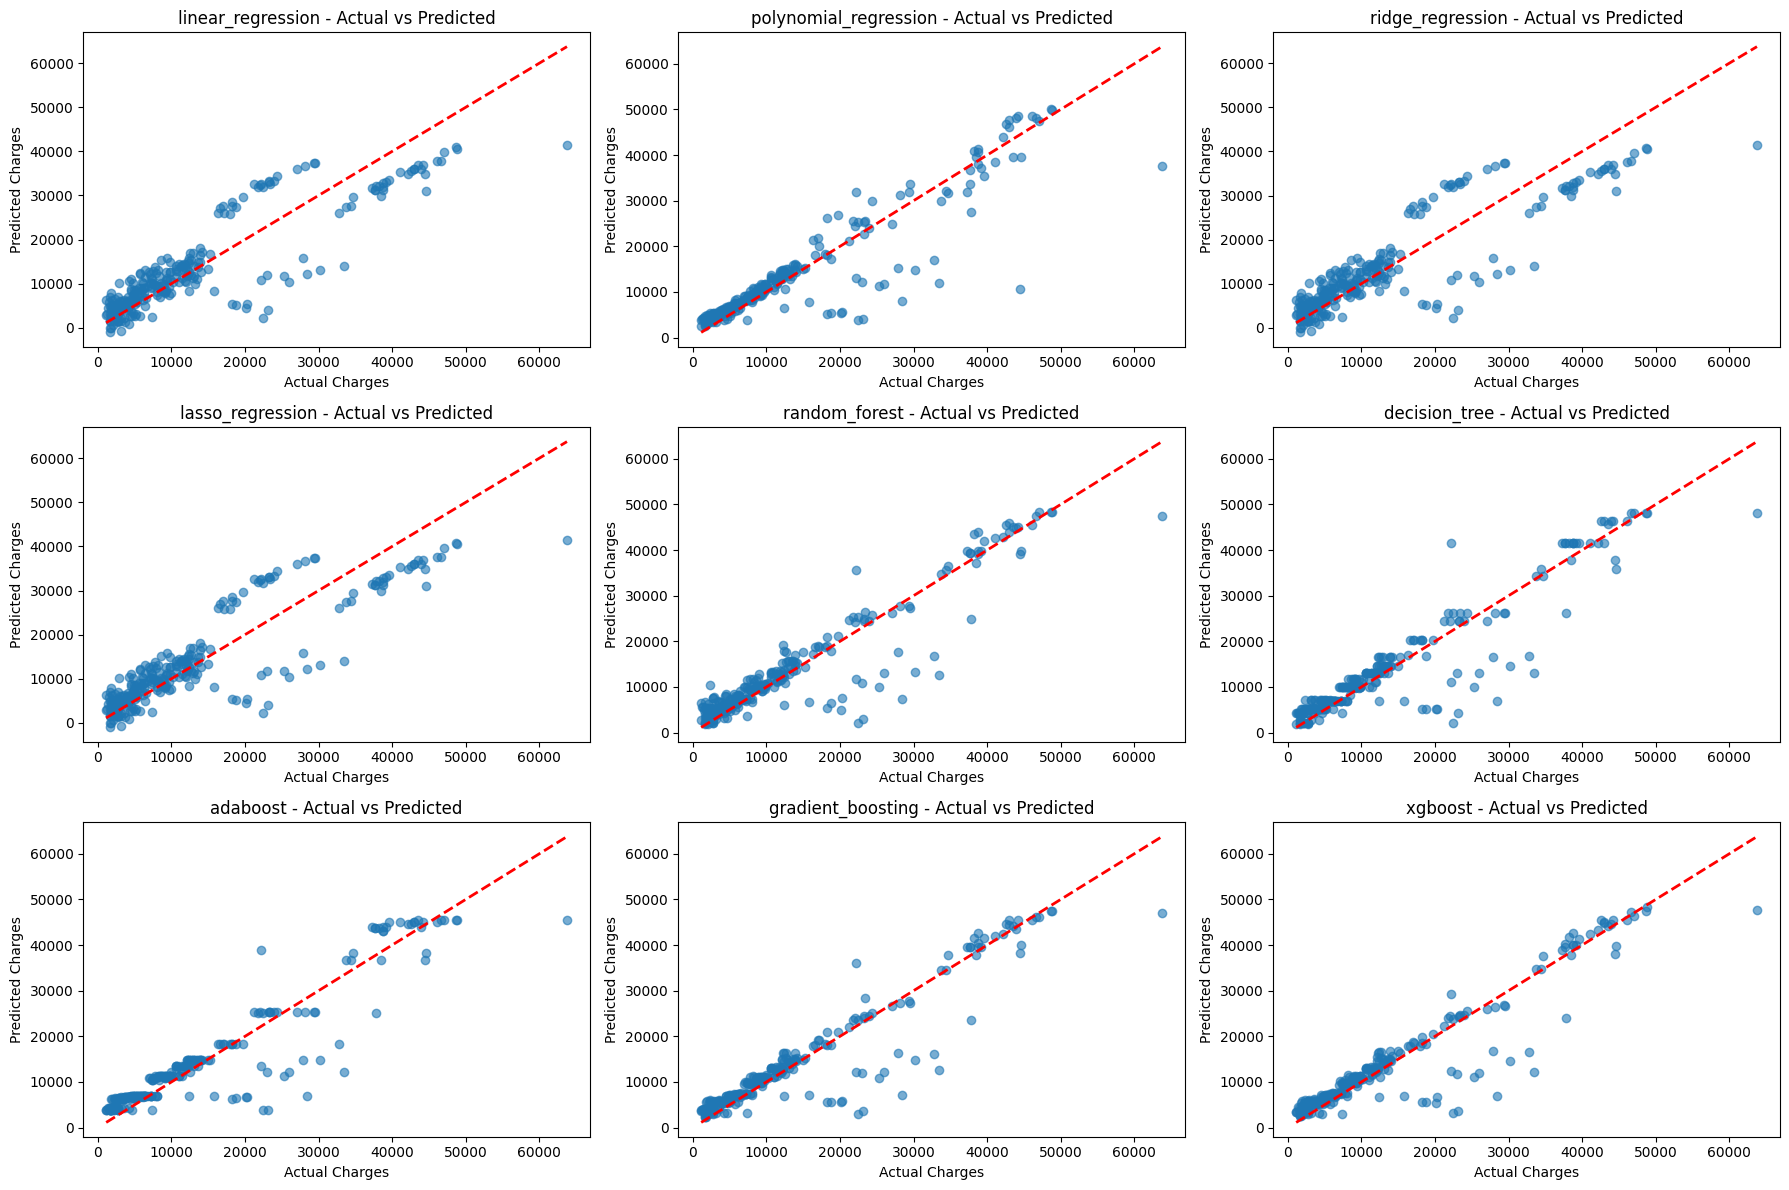

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Independent and dependent variables
independent_vars = ['age', 'bmi','smoker']
dependent_var = 'charges'

# Splitting the dataset
X = df1[independent_vars]
y = df1[dependent_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data for neural networks
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define algorithms and their hyperparameters
algos = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'polynomial_regression': {
        'model': Pipeline([
            ('poly_features', PolynomialFeatures()),
            ('linear_regression', LinearRegression())
        ]),
        'params': {
            'poly_features__degree': [2, 3, 4]
        }
    },
    'ridge_regression': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1, 10, 100],
            'solver': ['auto', 'svd', 'cholesky', 'saga']
        }
    },
    'lasso_regression': {
        'model': Lasso(),
        'params': {
            'alpha': [0.01, 0.1, 1, 10],
            'selection': ['random', 'cyclic']
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'adaboost': {
        'model': AdaBoostRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0]
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10]
        }
    },
    'xgboost': {
        'model': XGBRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10],
            'subsample': [0.8, 1.0]
        }
    }
}

# To store results
results = {}

# Perform grid search for each algorithm
for name, algo in algos.items():
    grid_search = GridSearchCV(algo['model'], algo['params'], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    percentage_errors = np.abs((y_test - y_pred) / y_test) * 100
    results[name] = {
        "Best Params": grid_search.best_params_,
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R²": r2_score(y_test, y_pred),
        "MPE": np.mean(percentage_errors),
        "Predictions": y_pred,
        "Percentage Errors": percentage_errors
    }

# Prepare the data for the table
metrics_table = {
    "Algorithm": [],
    "MAE": [],
    "MSE": [],
    "R²": [],
    "MPE (%)": []
}

for name, metrics in results.items():
    metrics_table["Algorithm"].append(name)
    metrics_table["MAE"].append(metrics['MAE'])
    metrics_table["MSE"].append(metrics['MSE'])
    metrics_table["R²"].append(metrics['R²'])
    metrics_table["MPE (%)"].append(metrics['MPE'])

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_table)

# Pretty-print the table
from tabulate import tabulate
print(tabulate(metrics_df, headers='keys', tablefmt='fancy_grid', showindex=False))

# Plot actual vs predicted charges
plt.figure(figsize=(18, 12))
for i, (name, metrics) in enumerate(results.items(), 1):
    plt.subplot(3, 3, i)
    plt.scatter(y_test, metrics["Predictions"], alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f"{name} - Actual vs Predicted")
    plt.xlabel("Actual Charges")
    plt.ylabel("Predicted Charges")

plt.tight_layout()
plt.show()


# All variables without scaling

╒═══════════════════════╤═════════╤═════════════╤══════════╤═══════════╕
│ Algorithm             │     MAE │         MSE │       R² │   MPE (%) │
╞═══════════════════════╪═════════╪═════════════╪══════════╪═══════════╡
│ linear_regression     │ 4181.19 │ 3.35969e+07 │ 0.783593 │   46.8883 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ polynomial_regression │ 2729.18 │ 2.08862e+07 │ 0.865466 │   30.1066 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ ridge_regression      │ 4195.71 │ 3.36545e+07 │ 0.783222 │   47.1843 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ lasso_regression      │ 4186.5  │ 3.36385e+07 │ 0.783325 │   47.0176 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ random_forest         │ 2431    │ 1.91951e+07 │ 0.876359 │   29.2317 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ decision_tree         │ 2652.03 │ 2.04428e+07 │ 0

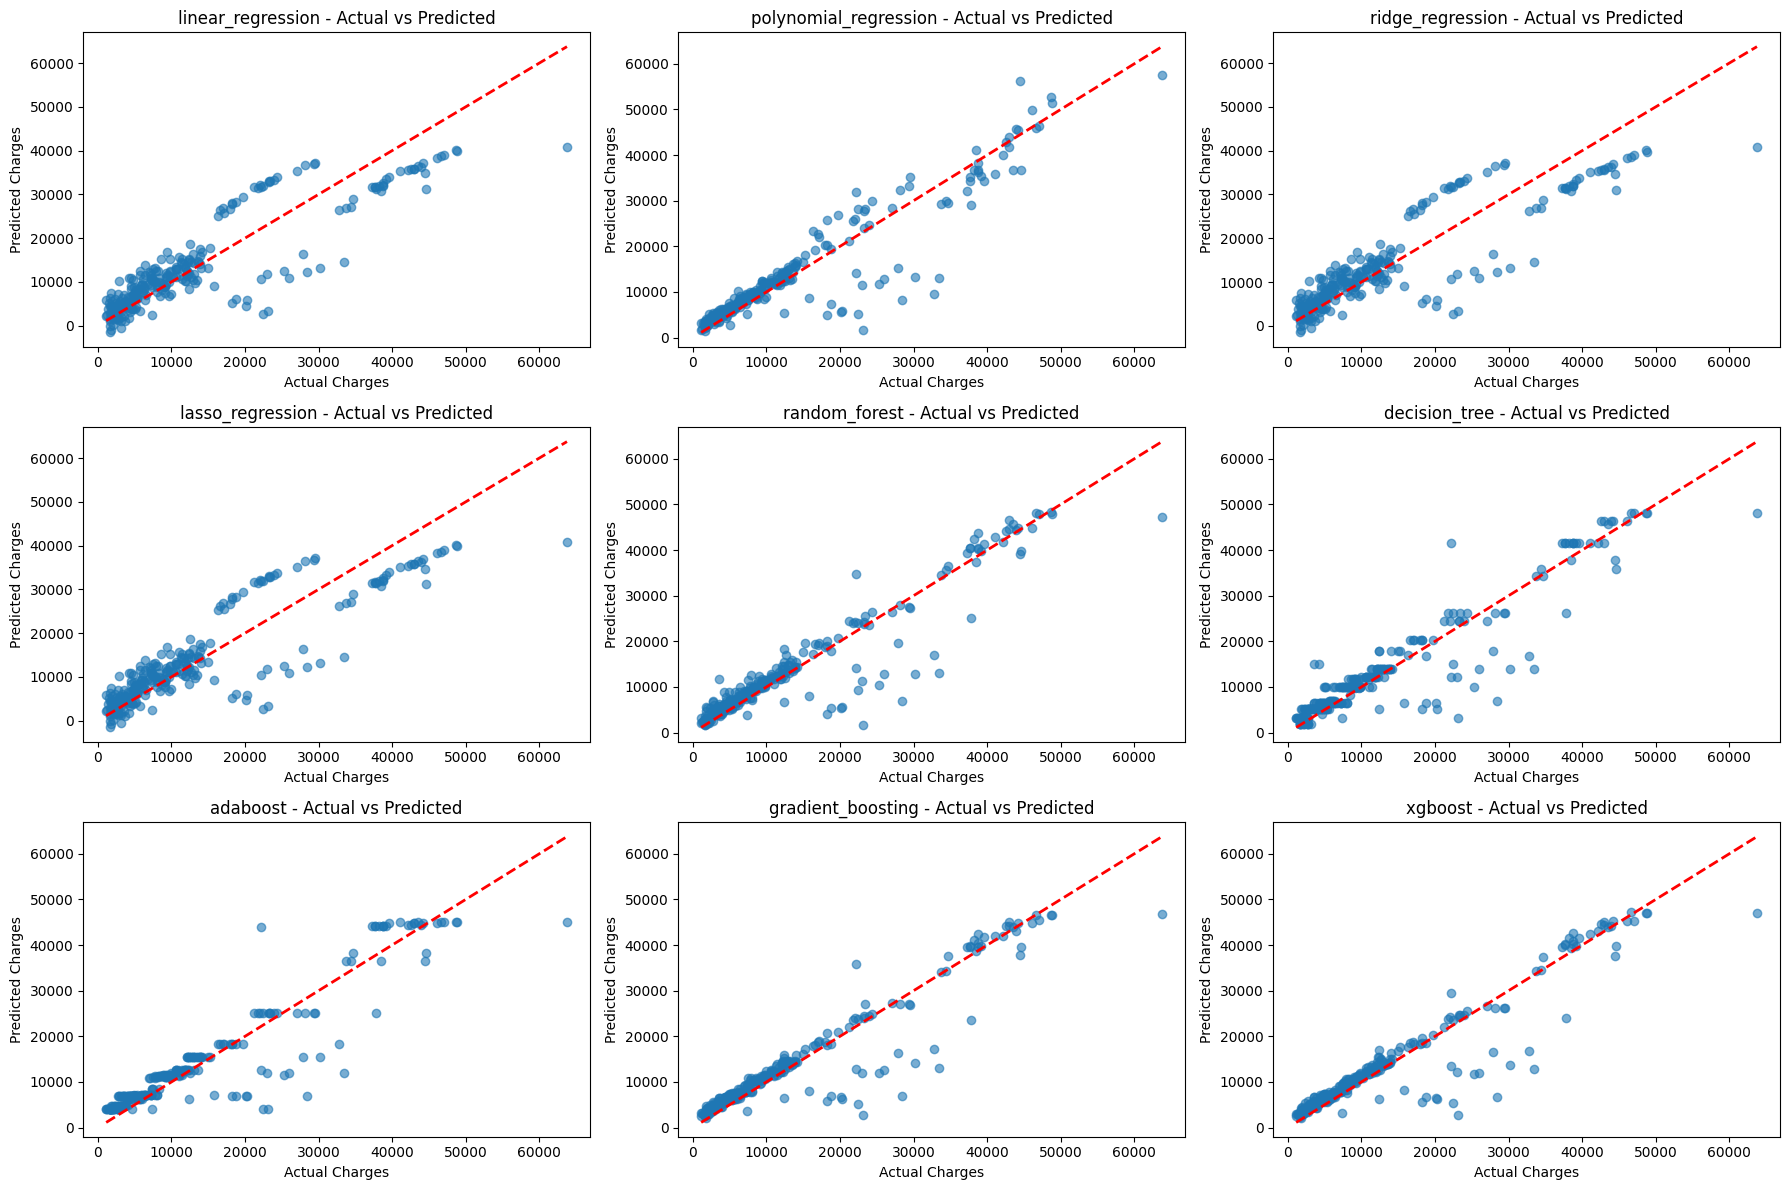

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Independent and dependent variables
independent_vars = ['age', 'bmi', 'children', 'sex', 'smoker',
                    'region_northeast', 'region_northwest', 'region_southeast']
dependent_var = 'charges'

# Splitting the dataset
X = df1[independent_vars]
y = df1[dependent_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define algorithms and their hyperparameters
algos = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'polynomial_regression': {
        'model': Pipeline([
            ('poly_features', PolynomialFeatures()),
            ('linear_regression', LinearRegression())
        ]),
        'params': {
            'poly_features__degree': [2, 3, 4]
        }
    },
    'ridge_regression': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1, 10, 100],
            'solver': ['auto', 'svd', 'cholesky', 'saga']
        }
    },
    'lasso_regression': {
        'model': Lasso(),
        'params': {
            'alpha': [0.01, 0.1, 1, 10],
            'selection': ['random', 'cyclic']
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'adaboost': {
        'model': AdaBoostRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0]
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10]
        }
    },
    'xgboost': {
        'model': XGBRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10],
            'subsample': [0.8, 1.0]
        }
    }
}

# To store results
results = {}

# Perform grid search for each algorithm
for name, algo in algos.items():
    grid_search = GridSearchCV(algo['model'], algo['params'], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    percentage_errors = np.abs((y_test - y_pred) / y_test) * 100
    results[name] = {
        "Best Params": grid_search.best_params_,
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R²": r2_score(y_test, y_pred),
        "MPE": np.mean(percentage_errors),
        "Predictions": y_pred,
        "Percentage Errors": percentage_errors
    }

# Prepare the data for the table
metrics_table = {
    "Algorithm": [],
    "MAE": [],
    "MSE": [],
    "R²": [],
    "MPE (%)": []
}

for name, metrics in results.items():
    metrics_table["Algorithm"].append(name)
    metrics_table["MAE"].append(metrics['MAE'])
    metrics_table["MSE"].append(metrics['MSE'])
    metrics_table["R²"].append(metrics['R²'])
    metrics_table["MPE (%)"].append(metrics['MPE'])

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_table)

# Pretty-print the table
from tabulate import tabulate
print(tabulate(metrics_df, headers='keys', tablefmt='fancy_grid', showindex=False))

# Plot actual vs predicted charges
plt.figure(figsize=(18, 12))
for i, (name, metrics) in enumerate(results.items(), 1):
    plt.subplot(3, 3, i)
    plt.scatter(y_test, metrics["Predictions"], alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f"{name} - Actual vs Predicted")
    plt.xlabel("Actual Charges")
    plt.ylabel("Predicted Charges")

plt.tight_layout()
plt.show()

# All variables with standard scaling

╒═══════════════════════╤═════════╤═════════════╤══════════╤═══════════╕
│ Algorithm             │     MAE │         MSE │       R² │   MPE (%) │
╞═══════════════════════╪═════════╪═════════════╪══════════╪═══════════╡
│ linear_regression     │ 4181.19 │ 3.35969e+07 │ 0.783593 │   46.8883 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ polynomial_regression │ 2743.4  │ 2.07246e+07 │ 0.866507 │   30.5028 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ ridge_regression      │ 4197.12 │ 3.36823e+07 │ 0.783043 │   47.2946 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ lasso_regression      │ 4181.52 │ 3.36206e+07 │ 0.78344  │   46.9303 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ random_forest         │ 2495.43 │ 1.99684e+07 │ 0.871378 │   29.6439 │
├───────────────────────┼─────────┼─────────────┼──────────┼───────────┤
│ decision_tree         │ 2652.03 │ 2.04428e+07 │ 0

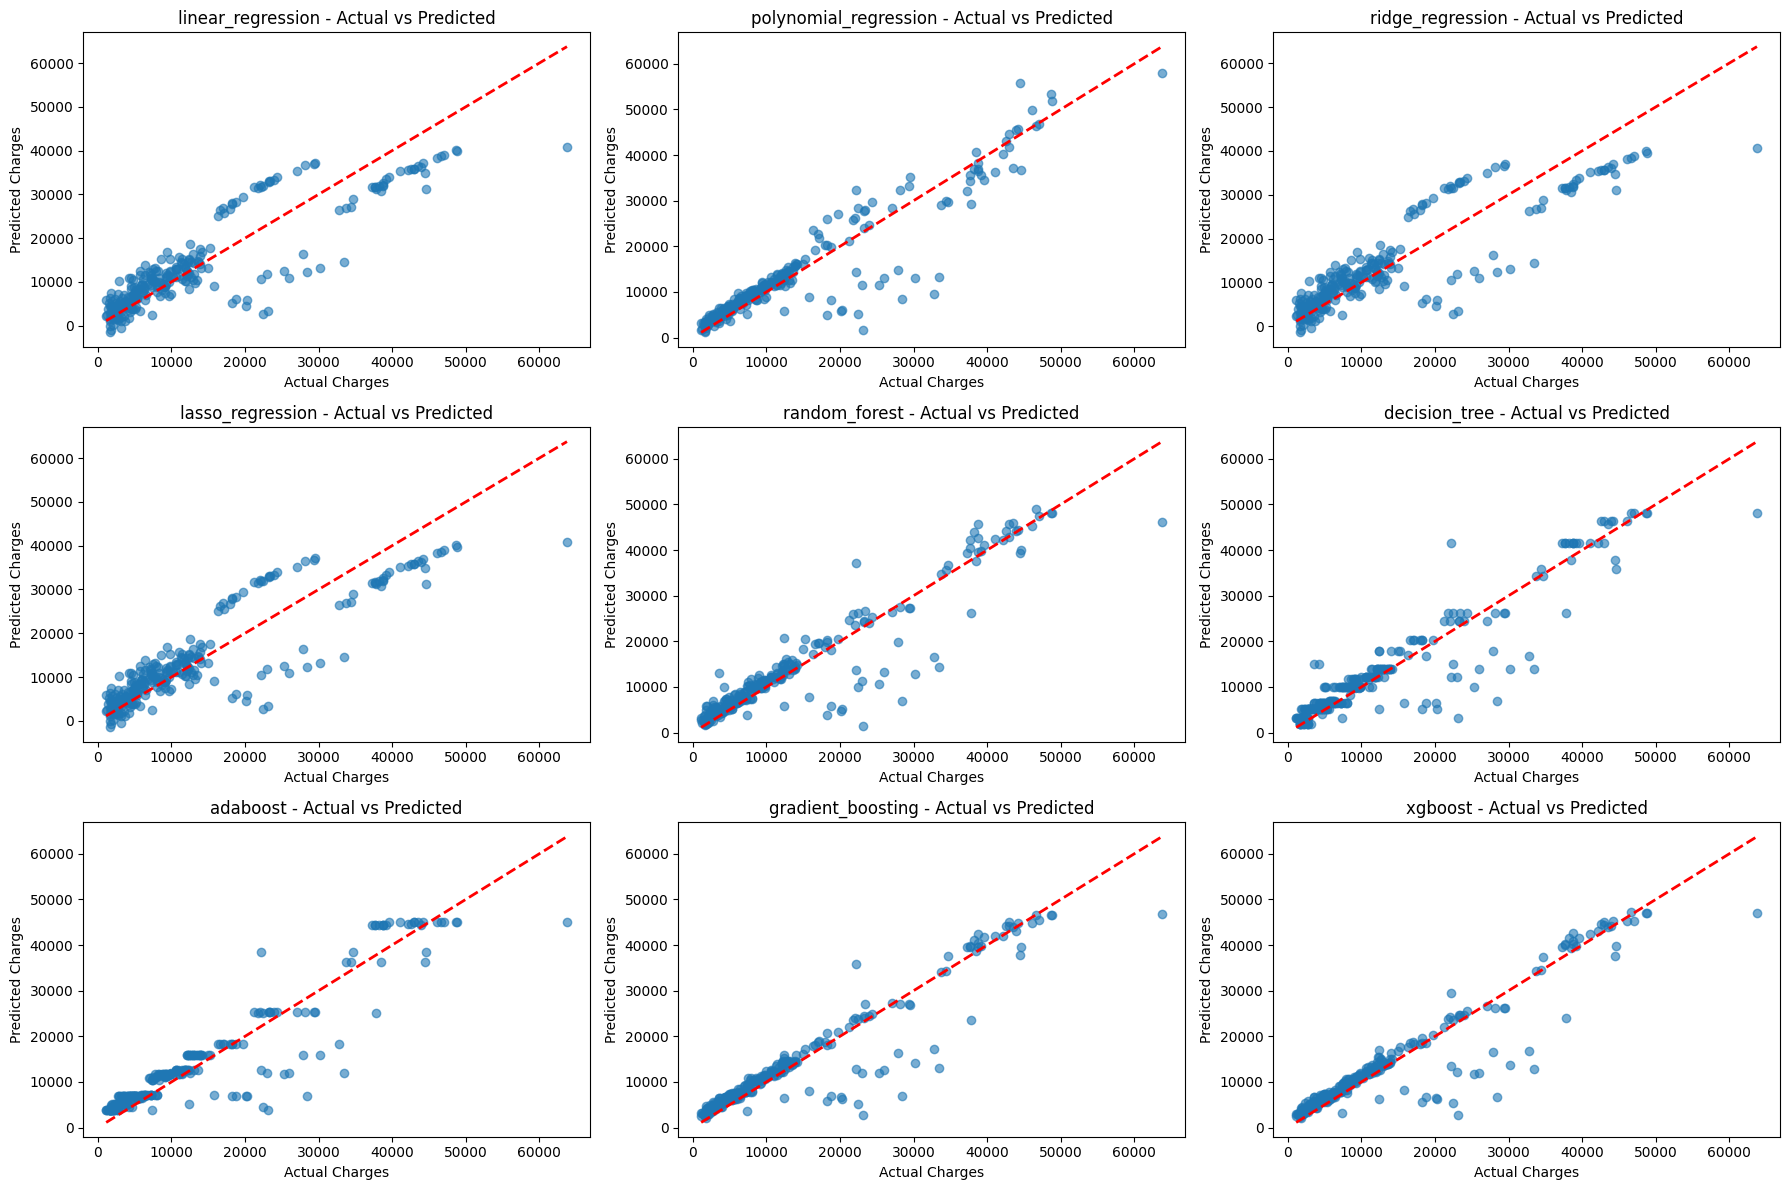

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Independent and dependent variables
independent_vars = ['age', 'bmi', 'children', 'sex', 'smoker',
                    'region_northeast', 'region_northwest', 'region_southeast']
dependent_var = 'charges'

# Splitting the dataset
X = df1[independent_vars]
y = df1[dependent_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data for neural networks
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define algorithms and their hyperparameters
algos = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'polynomial_regression': {
        'model': Pipeline([
            ('poly_features', PolynomialFeatures()),
            ('linear_regression', LinearRegression())
        ]),
        'params': {
            'poly_features__degree': [2, 3, 4]
        }
    },
    'ridge_regression': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1, 10, 100],
            'solver': ['auto', 'svd', 'cholesky', 'saga']
        }
    },
    'lasso_regression': {
        'model': Lasso(),
        'params': {
            'alpha': [0.01, 0.1, 1, 10],
            'selection': ['random', 'cyclic']
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'adaboost': {
        'model': AdaBoostRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0]
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10]
        }
    },
    'xgboost': {
        'model': XGBRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10],
            'subsample': [0.8, 1.0]
        }
    }
}

# To store results
results = {}

# Perform grid search for each algorithm
for name, algo in algos.items():
    grid_search = GridSearchCV(algo['model'], algo['params'], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    percentage_errors = np.abs((y_test - y_pred) / y_test) * 100
    results[name] = {
        "Best Params": grid_search.best_params_,
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R²": r2_score(y_test, y_pred),
        "MPE": np.mean(percentage_errors),
        "Predictions": y_pred,
        "Percentage Errors": percentage_errors
    }

# Prepare the data for the table
metrics_table = {
    "Algorithm": [],
    "MAE": [],
    "MSE": [],
    "R²": [],
    "MPE (%)": []
}

for name, metrics in results.items():
    metrics_table["Algorithm"].append(name)
    metrics_table["MAE"].append(metrics['MAE'])
    metrics_table["MSE"].append(metrics['MSE'])
    metrics_table["R²"].append(metrics['R²'])
    metrics_table["MPE (%)"].append(metrics['MPE'])

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_table)

# Pretty-print the table
from tabulate import tabulate
print(tabulate(metrics_df, headers='keys', tablefmt='fancy_grid', showindex=False))

# Plot actual vs predicted charges
plt.figure(figsize=(18, 12))
for i, (name, metrics) in enumerate(results.items(), 1):
    plt.subplot(3, 3, i)
    plt.scatter(y_test, metrics["Predictions"], alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f"{name} - Actual vs Predicted")
    plt.xlabel("Actual Charges")
    plt.ylabel("Predicted Charges")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 328354560.0000 - mae: 13595.2920 - val_loss: 310353792.0000 - val_mae: 12655.1826
Epoch 2/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 323663072.0000 - mae: 13456.3164 - val_loss: 310324768.0000 - val_mae: 12654.6543
Epoch 3/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 308500544.0000 - mae: 13230.8789 - val_loss: 310271392.0000 - val_mae: 12653.9443
Epoch 4/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 313296128.0000 - mae: 13147.7168 - val_loss: 310195488.0000 - val_mae: 12653.0820
Epoch 5/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 346073760.0000 - mae: 13914.7080 - val_loss: 310082752.0000 - val_mae: 12651.6689
Epoch 6/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 308822400.0000 - mae: 13299.8447 - val_loss: 309904352.0000 - val_mae: 12649.1748
Epoch 7/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 317493056.0000 - mae: 13402.1445 - val_loss: 309667680.0000 - val_mae: 12645.6416
Epoch 8/200


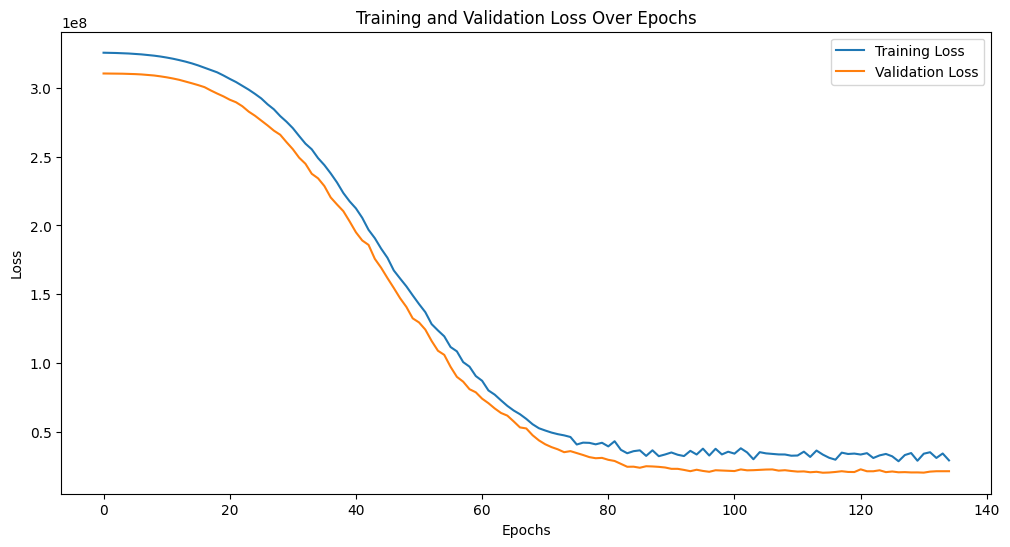

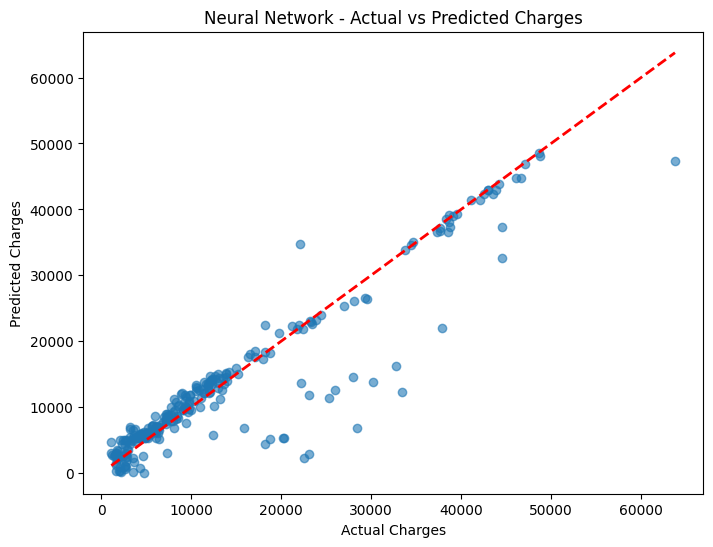

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Independent and dependent variables
independent_vars = ['age', 'bmi','smoker']
dependent_var = 'charges'

# Splitting the dataset
X = df1[independent_vars]
y = df1[dependent_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the Neural Network
nn_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
history = nn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop]
)

# Evaluate the model
y_pred_nn = nn_model.predict(X_test_scaled).flatten()

# Compute metrics using NumPy
mae = np.mean(np.abs(y_test - y_pred_nn))  # Mean Absolute Error
mse = np.mean((y_test - y_pred_nn) ** 2)   # Mean Squared Error
r2 = 1 - np.sum((y_test - y_pred_nn) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)
percentage_errors_nn = np.abs((y_test - y_pred_nn) / y_test) * 100
mpe = np.mean(percentage_errors_nn)  # Mean Percentage Error

# Display metrics
print("\nNeural Network Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
print(f"Mean Percentage Error (MPE): {mpe}%")

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot actual vs predicted charges
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Neural Network - Actual vs Predicted Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 313731136.0000 - mae: 13369.8555 - val_loss: 310353600.0000 - val_mae: 12655.2686
Epoch 2/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 341068928.0000 - mae: 13805.1309 - val_loss: 310324800.0000 - val_mae: 12654.8711
Epoch 3/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 338225952.0000 - mae: 13482.6494 - val_loss: 310258432.0000 - val_mae: 12654.0928
Epoch 4/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 326823040.0000 - mae: 13349.5264 - val_loss: 310153536.0000 - val_mae: 12652.8086
Epoch 5/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 315810336.0000 - mae: 13408.8418 - val_loss: 310001216.0000 - val_mae: 12650.8877
Epoch 6/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 341233536.0000 - mae: 13842.1709 - val_loss: 309740224.0000 - val_mae: 12647.2686
Epoch 7/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 323816672.0000 - mae: 13657.4590 - val_loss: 309374176.0000 - val_mae: 12641.9297
Epoch 8/200


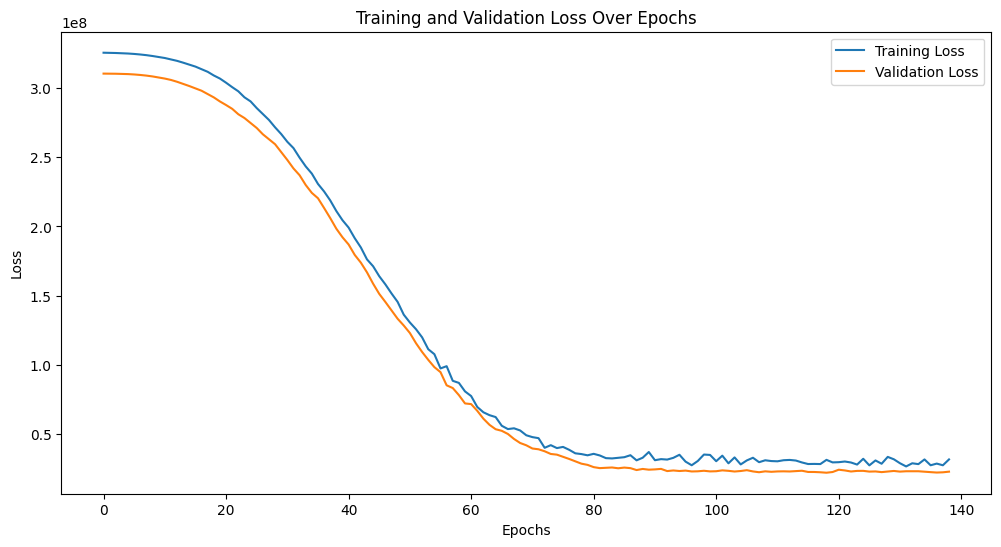

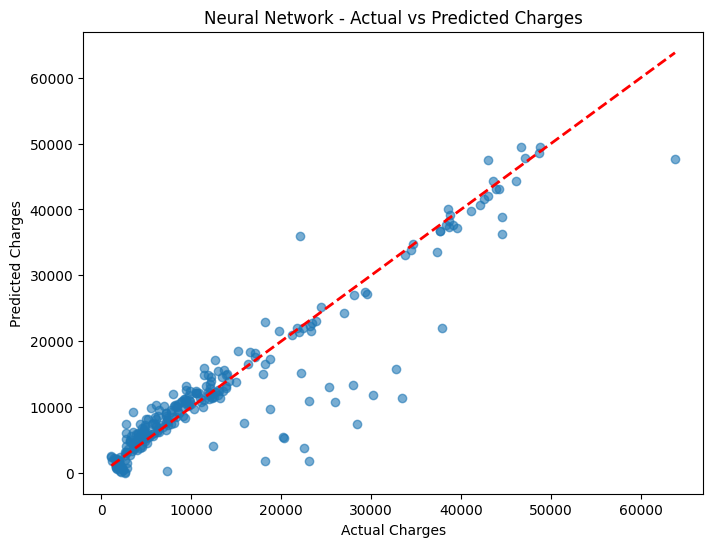

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Independent and dependent variables
independent_vars = ['age', 'bmi', 'children', 'sex', 'smoker',
                    'region_northeast', 'region_northwest', 'region_southeast']
dependent_var = 'charges'

# Splitting the dataset
X = df1[independent_vars]
y = df1[dependent_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the Neural Network
nn_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
history = nn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop]
)

# Evaluate the model
y_pred_nn = nn_model.predict(X_test_scaled).flatten()

# Compute metrics using NumPy
mae = np.mean(np.abs(y_test - y_pred_nn))  # Mean Absolute Error
mse = np.mean((y_test - y_pred_nn) ** 2)   # Mean Squared Error
r2 = 1 - np.sum((y_test - y_pred_nn) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)
percentage_errors_nn = np.abs((y_test - y_pred_nn) / y_test) * 100
mpe = np.mean(percentage_errors_nn)  # Mean Percentage Error

# Display metrics
print("\nNeural Network Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
print(f"Mean Percentage Error (MPE): {mpe}%")

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot actual vs predicted charges
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Neural Network - Actual vs Predicted Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()


In [ ]:
pip install tensorflow pydot graphviz


In [ ]:
!pip install pydot
!pip install graphviz
from tensorflow.keras.utils import plot_model # Changed import statement
from tensorflow.keras.models import Sequential # Changed import statement
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout # Changed import statement

# Define the neural network model
nn_model = Sequential([
    Dense(128, activation='relu', input_dim=10),  # Replace input_dim with your actual input size
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Save the model structure as an image
plot_model(nn_model, to_file='nn_structure.png', show_shapes=True, show_layer_names=True, dpi=96)
print("Neural network structure saved as 'nn_structure.png'")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural network structure saved as 'nn_structure.png'
